$$\newcommand{\mean}[1]     {\langle #1 \rangle}$$
$$\newcommand{\spins}       {\mathbb{S}}$$
$$\newcommand{\spinsmu}     {\mathbb{S}_{\mu}}$$
$$\newcommand{\spini}       {s_{i}}$$
$$\newcommand{\spinj}       {s_{j}}$$
$$\newcommand{\Ham}         {\mathcal{H}}$$
$$\newcommand{\kB}          {k_B}$$
$$\newcommand{\ra}          {\rightarrow}$$

# Assignment 3: Ising model

## Introduction

In the lectures, we've been discussing the physics, some of the history, and the computational methods that underlie the analysis of the deceptively simple *Ising model*. In this assignment, you will bring much of that to bear by evaluating the evolution towards equilibrium of the Ising model system in 2 dimensions, and analyze the properties of the system once it reaches equilibrium. Given the extensive nature of this assigment, and the fact that it relies on much of what we have discussed so far, you have 2 weeks to complete it. That is, the assigments are due on *November 1st at 2pm* (via `GitHub` as usual).

I will include some of the background material that we discussed in lecture also here in order to keep this assignment somewhat self contained.

## Table of Contents

1. [Ising model](#ising-model)
1. [Monte Carlo methods](#monte-carlo)
1. [The Metropolis algorithm](#metropolis)
1. [Assignment description](#assignment)
    1. [Exercise 1: Basic lattice setup](#ex1)
    1. [Exercise 2: Randomly choose & flip a lattice point](#ex2)
    1. [Exercise 3: Nearest neighbors](#ex3)
    1. [Exercise 4: Calculating the energy of the lattice](#ex4)
    1. [Exercise 5: Calculate the magnetisation of the lattice](#ex5)
    1. [Exercise 6: Implement the Metropolis algorithm](#ex6)
    1. [Exercise 7: Perform measurements](#ex7)

***

## The Ising Model <a class="anchor" name="ising-model"></a>

In seeking to explain a particular phenomenon in physics, namely the onset of ferromagnetism, Wilhelm Lenz proposed in 1924 that his PhD student, Ernst Ising, should solve a puzzling 1-dimensional model of  [[arXiv:1706.01764](https://arxiv.org/abs/1706.01764)]. This model was meant to attempt to describe the interaction of 

> "elementary magnetic units, which prefer alignment"

a problem which belonged to the new and undeveloped quantum mechanics. In order to make any progress at all, Ising started in 1 dimension with the task of calculating analytically the macroscopic magnetization with the methods of statistical mechanics. This deceptively *"simple"* model for a set of spin states $\mathbb{S} = \{s_i\}$, with a Hamiltonian, $\Ham$, for a given interaction coupling, $J$, and magnetic field, $H$, given by:

  \begin{equation}
    \Ham = -J \sum_{\mean{ij}}^N \spini \spinj - H \sum_i \spini "
  \end{equation} 

Given a set of $N$ spins, the Ising model has $2^N$ states $\mathbb{S} = \{s_i\}$ in $d=2$ dimensions. 

* What happens to the system when we let it evolve according to the laws of statistical mechanics? 
* Does the average spin remain random? 
* How does the application of an external field affect its evolution? 
* Can we calculate a specific heat for this system (the temperature change required to raise the system's energy by a given amount)?

The energy $E_{\mu}$ of a particular microstate $\mu$ of this (discrete) system is given by the operator $\Ham$ acting on that microstate, or specific  $\spins = \spinsmu$. We assume that although the system is in an $\textbf{equilibrium state}$ (i.e. the energy of a particular element is proportional to the temperature, $T$), it is a dynamic one in which each element's energy fluctuates as it exchanges energy with its environment. The probability for the ensemble $\spins$ to have energy $E_{\mu}$ is 
  
  \begin{equation}
    P(\spinsmu) = \frac{e^{-\beta E_{\mu}}}{\sum_{\mu} e^{-\beta E_{\mu}}},
  \end{equation} 

  And the mean and variance of the energy $\mean{E}$ (or *any* observable) is given by 
  
  \begin{eqnarray}
    \mean{E} &=& \sum_{\mu} E_{\mu} P(\spinsmu) = \frac{1}{Z} \sum_{\mu} E_{\mu} e^{-\beta E_{\mu}} \\
    Var(E) = \mean{(E-\mean{E}^2)^2} &=& \sum_{\mu} E^2_{\mu} P(\spinsmu) - \left( \sum_{\mu} E_{\mu} P(\spinsmu) \right)^2
  \end{eqnarray} 
  
  
***

##  Monte Carlo Methods <a class="anchor" name="monte-carlo"></a>

There is essentially only one known numerical method for calculating the partition function of a model such as the Ising model on a large lattice, and that method is *Monte Carlo simulation*. 
  
* If we are clever enough, we can obtain a *relatively good estimate* by only performing a *subset* of the calculations, $\{\mu\}$ instead of all $\mu$
* One way to be clever is to only sample the distribution that we are attempting to model, $P(\spinsmu)$ in regions where it is important.
* To put it another way, we want to perform a *weighted sampling*

  \begin{eqnarray}
    \mean{E} &=& \frac{\sum_{\{\mu\}} E_{\mu} e^{-\beta E_{\mu}} W_{\mu}^{-1}}{\sum_{\{\mu\}} e^{-\beta E_{\mu}} W_{\mu}^{-1}} \\
       &\approx& \frac{\sum_{\{\mu\}} E_{\mu}}{\sum_{\{\mu\}} 1} \\
       &=& \frac{1}{N^{\prime}}\sum_{\{\mu\}} E_{\mu}
  \end{eqnarray} 

  where $N^{\prime}$ is the number of terms in the subset $\{\mu\}$ and $W_{\mu} = e^{- \beta E_{\mu}}/Z$. Here, I have already set the weighting function to be the Boltzmann factor because of our discussion in lecture about the Metropolis algorithm.

## The Metropolis algorithm <a class="anchor" name="metropolis"></a>

In the famous paper *"Equation of State Calculations by Fast Computing Machines"*, Nicholas Metropolis, Arianna W. Rosenbluth, Marshall N. Rosenbluth, Augusta H. Teller, and Edward Teller proposed to use a Boltzmann factor for attempting the *trials* for a given change in configuration of the lattice.

There are two major assumptions and principles that enter into the ability to use the Metropolis algorithm:

1. Ergodicity
1. Detailed balance

For *ergodicity*, the method must allow that for a sufficiently long period of time, *all accessible microstates will be sampled*. A corollary is that the time spent by a system in some region of the phase space of microstates with the same energy is proportional to the volume of this region. 

The implication for our computational approach is that in principle, it should be *possible for our Markov process to reach any state of the system from any other state*, if we run it for long enough. 
  
The condition of ergodicity tells us that we are allowed to make some of the transition probabilities of our Markov process zero, but that there must be at least one path of non-zero transition probabilities between any two states that we pick. 
  
In practice, most Monte Carlo algorithms set almost all of the transition probabilities to zero, and we *must be careful that in so doing we do not create an algorithm which violates ergodicity*.

The *detailed balance* equation then tells us that the transition probabilities should satisfy
  
  \begin{equation}
    \frac{P(\mu \ra \nu)}{P(\nu \ra \mu)} = \frac{P(\spins_{\nu})}{P(\spins_{\mu})} = e^{- \beta (E_{\nu} - E_{\mu})} = e^{- \beta \Delta E}
  \end{equation}
  
This equation and the requirement that the sum of all probabilities is unity are the basic constraints on our choice of transition probabilities. If we satisfy these, as well as the condition of ergodicity, then the equilibrium distribution of states in our Markov process will be the Boltzmann distribution. It is also useful to break this down a bit further:

  \begin{eqnarray}
    P(\mu \ra \nu) &=& g(\mu \ra \nu) A(\mu \ra \nu) \\
    \frac{P(\mu \ra \nu)}{P(\nu \ra \mu)} &=& \frac{g(\mu \ra \nu) A(\mu \ra \nu)}{g(\nu \ra \mu) A(\nu \ra \mu)}
  \end{eqnarray}
 
where $g$ is a *selection probability* and $A$ is the *acceptance ratio* or *acceptance probability*.

* $g(\mu \ra \nu)$ **is the selection probability**
    * this is the probability, given an initial state $\mu$, that our algorithm will generate a new target state $\nu$. 
* $A(\mu \ra \nu)$ **is the acceptance probability**
    * The acceptance ratio says that if we start off in a state $\mu$ and our algorithm generates a new state $\nu$ from it, we should accept that state and change our system to the new state $\nu$ a fraction of the time $A(\mu \ra \nu)$. 
    * The rest of the time we should just stay in the state $\mu$.
    * If the acceptance ratios for our moves are low, then the algorithm will on most time steps simply stay in the state.

  
In the Metropolis algorithm the selection probabilities $g(\mu \ra \nu)$ for each of the possible states $\nu$ are all chosen to be equal.

***

## Assignment description <a class="anchor" name="assignment"></a>

In this assignment, you will fully simulate and then evaluate the 2-dimensional Ising model for system of spins that can be either spin up or spin down. There are several parts or exercises to this assignment, so read carefully and please ask questions if anything is unclear! 

*Please note:* I will give you much of what needs to be used here, and we will actively develop some of it in lectures during Week 4 as well, so don't get too worried about the apparent length. 

Also, Excercises 1-6 are effectively meant to walk you through the development phase of the computational algorithm. If you have your own conception of the design of this piece of software that you wish to use, please feel free to do so, as long as it is sufficiently well documented what you have done and how to run it. 


In [2]:
# Import the usual numpy and matplotlib libraries for numerical operations and plotting
import numpy as np
import matplotlib.pyplot as plt
from numpy import random as rng
import datetime,timeit
from mpl_toolkits.mplot3d import Axes3D

### Exercise 1: Basic lattice setup <a class="anchor" name="ex1"></a>
Here I just want you to write a few functions that will fill a lattice. I will provide some suggestions in the Jupyter notebook provided as a starting point. 

I suggest that you create 3 functions:
1. `normallattice`: create $N\times M$ lattice with uniform spin values
1. `randomlattice`: create $N\times M$ lattice with random spin values
1. `plotlattice`: plot an image of the lattice with a colour code for the spin

In [3]:
# Uniform Lattice creation
spin_mag = 5
def normallattice(N, M, value=0):
    '''
    This function returns an N (rows) x M (columns) lattice with identical values value
    '''
    
    return np.full((N, M), value)


In [4]:
# Random Lattice creation
def randomlattice(N, M):
    '''
    This function returns an N (rows) x M (columns) lattice with randomized spin values 0 or 1
    '''
    return rng.choice([-1,1], (N, M))


In [5]:
def plotlattice(lattice,spin_mag = 5):
    plt.imshow(lattice,cmap = "bwr")
    plt.colorbar(ticks = [-1,1])
    plt.show()

### Exercise 2: Randomly choose & flip a lattice point <a class="anchor" name="ex2"></a>
We now need two functions:
1. a function to randomly select one of the particles in the lattice and return its coordinates $(i,j)$. 
1. a function to flip the spin of the particle pointed by the $(i,j)$ indices and return the new lattice state.

In [6]:
def pickpoint(lattice):
    
    i = rng.randint(0,len(lattice))
    j = rng.randint(0,len(lattice[0]))
    return i,j
def flip_spin(lattice,i,j):
    lattice[i][j] = -1*lattice[i][j]
    return lattice

def random_flip(lattice):
    i,j = pickpoint(lattice)
    lattice = flip_spin(lattice,i,j)
    return lattice



def pickpoint3D(lattice):
    
    i = rng.randint(0,len(lattice))
    j = rng.randint(0,len(lattice[0]))
    k = rng.randint(0,len(lattice[0][0]))
    return i,j,k


### Exercise 3: Nearest neighbors <a class="anchor" name="ex3"></a>
A key element of this model is calculating the combined spin state of the 4 nearest neighbors around a given lattice point $(i,j)$.

Write a function to return the combined spin state and which respects periodic boundary conditions.

I suggest that you develop your code with a *small*, say, 5x5 lattice. Once you have convinced yourself that this functions correctly, you can move to the next item and also expand your lattice (no use debugging a big model that takes lots of time to evaluate).

In [7]:
def neighborsSum(lattice, i, j):
    '''
    Sums the spins of the lattice points at four neighbor sites.
        Takes into account the size of the lattice in 
        terms of number of rows (i) and columns (j),
        thus implementing periodic boundary conditions.
    '''
    ip1 = (i + 1) % len(lattice)
    im1 = (i - 1) % len(lattice)
    jp1 = (j + 1) % len(lattice[0])
    jm1 = (j - 1) % len(lattice[0])
        

    return (lattice[ip1][j] + lattice[im1][j]
                + lattice[i][jp1] + lattice[i][jm1])
 

### Exercise 4: Calculating the energy of the lattice <a class="anchor" name="ex4"></a>
The local energy is defined as the total interaction energy between the selected particle and its immediate neighbours. 

1. write a function to calculate this.
1. also write a function to calculate the total energy of the lattice.

Again, I suggest that you perform some tests with a simple 5x5 lattice, for example:
1. Compare the energy of the lattice for different configuations of spins. 
1. What is the total energy of the system when all spins point up or down or randomly? 


Pseudo Code
1. Iterarate over all lattice  sites
2. Calculate the local energy at that site
3. Create a sum of all these local sites 

def localenergy(lattice,i,j)
This function will essentially be -Jlattice[i][j] *neighborSums[i][j]

def totalenergy(lattice):
sumEnergy = 0
for i in rows:
for j in columns:
sum += localenergy(lattice,i,j)

In [8]:
def localEnergy(lattice,i,j,J=1,H=0):
    return -J*lattice[i][j]*neighborsSum(lattice,i,j)
def totalEnergy(lattice,J=1,H=0):
    sumEnergy = 0
    for i in range(len(lattice)):
        for j in range(len(lattice[i])):
            sumEnergy += localEnergy(lattice,i,j,J=J)
    sumEnergy += -H*totalMagnetization(lattice)
    return sumEnergy


### Exercise 5: Calculate the magnetisation of the lattice <a class="anchor" name="ex5"></a>
Implement functions to calculate 

1. The total magnetisation of the lattice
1. The magnetisation per spin

Again, I suggest that you perform some tests with a simple 5x5 lattice first, for example:
1. What will be the value of $m$ if all spins are aligned up? what if all the spins are aligned down? What if half of the spins are up and half are down?
1. Set an initial condition with $m = 1.0$, that is all the spins point up. Try to perturb a few particles and recalculate the magnetisation

np.sum(lattice) = totmagnetisation (Look at documentation)



In [9]:
def totalMagnetization(lattice):
    totMag =np.sum(lattice)
    return totMag
def perMagnetization(lattice):
    totMag = np.sum(lattice)
    perMag = totMag/(len(lattice)*len(lattice[0]))
    return perMag




### Exercise 6: Implement the Metropolis algorithm <a class="anchor" name="ex6"></a>
At this point in your the code you should have all the nesscessary functions properly implemented and the thermodynamic simulation of the system can take place. 

1. Set up the system in an initial configuration
1. Choose one of the particles at random using a Markov Monte Carlo approach
1. Calculate the energy change $\Delta E$ of the system if the spin of the chosen particle is flipped
1. If $\Delta E$  is negative, then select to flip the spin and go to step 7, otherwise ....
1. Generate a random number $r$ such that $0 < r < 1$
1. If this number is less than the probability of $\Delta E$ i.e. $r < e^{-\Delta E/\kB T}$, then flip the spin. 
1. Choose another spin of the lattice at random and repeat steps 2 to 6 a chosen number of times ($N_{MCS}$)

Now we shall implement the Metropolis algorithim. We shall first begin by setting up a lattice.

Next, we shall pick an element at random to begin. We shall calculate the energy with this spin unflipped, and then we shall flip it and see what the change in energy was.

In [10]:
def metropolisInefficient(lattice,Num_Steps,T=1,J=1,H=0):
    N = len(lattice)
    M = len(lattice[0])
    magneticMag = np.zeros(Num_Steps)
    print('J = ' + str(J) + ', T = '+ str(T), 'H = ' + str(H))
    print("Initial Magnetization = " + str(totalMagnetization(lattice)))
    plotlattice(lattice)
    for k in range(Num_Steps):
        initEnergy = totalEnergy(lattice,H)

    #We have calculated our initial energy of the system
        i = rng.randint(N)
        j = rng.randint(M)
    ## Now we shall flip our spin, calculate the energy, and then flip the spin back. This saves us the trouble of
    #dealing with object stuff.

        flip_spin(lattice,i,j)
        finalEnergy = totalEnergy(lattice,H)
    #Now that we have flipped back our spin, we can calculate deltaEnergy.
        deltaEnergy =finalEnergy-initEnergy
        flip_spin(lattice,i,j)
        if deltaEnergy > 0:
            r = rng.random()
            if r<np.exp(-1*deltaEnergy/T):
                flip_spin(lattice,i,j)
        if (k%(Num_Steps/10)) == 0:
            print(str((k/(Num_Steps/10))*10) + " percent")
            plotlattice(lattice)
        magneticMag[k] = totalMagnetization(lattice)
    plotlattice(lattice)
    print("Final Magnetization = " + str(totalMagnetization(lattice)))
    return lattice,magneticMag

In [11]:
def metropolisSimple(lattice,Num_Steps,H=0):
    N = len(lattice)
    M = len(lattice[0])
    print("Initial Magnetization = " + str(totalMagnetization(lattice)))
    plotlattice(lattice)
    for k in range(Num_Steps):
    #We have calculated our initial energy of the system
        i = rng.randint(N)
        j = rng.randint(M)
    ## Now we shall flip our spin, calculate the energy, and then flip the spin back. This saves us the trouble of
    #dealing with object stuff.
        localEnergy1 = localEnergy(lattice,(i+1)% len(lattice) ,j) + localEnergy(lattice,(i-1) % len(lattice),j) + localEnergy(lattice,i,(j+1) % len(lattice[0])) + localEnergy(lattice,i,(j-1) %len(lattice[0]))
        flip_spin(lattice,i,j)
        localEnergy2 = localEnergy(lattice,(i+1)% len(lattice),j) + localEnergy(lattice,(i-1)% len(lattice),j) + localEnergy(lattice,i,(j+1) % len(lattice[0])) + localEnergy(lattice,i,(j-1) % len(lattice[0]))
    #Now that we have flipped back our spin, we can calculate deltaEnergy.
        deltaEnergy =2*(localEnergy2 - localEnergy1)
        T=1
        if deltaEnergy > 0:
            r = rng.random()
            if r>=np.exp(-1*deltaEnergy/T):
                flip_spin(lattice,i,j)
        if (k%(Num_Steps/10)) == 0:
            print(str((k/(Num_Steps/10))*10) + " percent")
            plotlattice(lattice)
    plotlattice(lattice)
    print("Final Magnetization = " + str(totalMagnetization(lattice)))
    return lattice

In [12]:
print(rng.randint(5))

0


In [13]:
def metropolisCustom(lattice,Num_Steps,T=1,J=1,H=0):
    N = len(lattice)
    M = len(lattice[0])
    magneticMag = []
    #print("Initial Magnetization = " + str(totalMagnetization(lattice)))
    print('J = ' + str(J) + ', T = '+ str(T), 'H = ' + str(H))
    #plotlattice(lattice)
    for k in range(Num_Steps):
    #We have calculated our initial energy of the system
        i = rng.randint(N)
        j = rng.randint(M)
    ## Now we shall flip our spin, calculate the energy, and then flip the spin back. This saves us the trouble of
    
    #dealing with object stuff.
        if H == 0:
            localEnergy1 = localEnergy(lattice,i,j,J)+ localEnergy(lattice,(i+1)% len(lattice) ,j,J) + localEnergy(lattice,(i-1) % len(lattice),j,J) + localEnergy(lattice,i,(j+1) % len(lattice[0]),J) + localEnergy(lattice,i,(j-1) %len(lattice[0]),J)
            flip_spin(lattice,i,j)
            localEnergy2 = localEnergy(lattice,i,j,J)+ localEnergy(lattice,(i+1)% len(lattice),j,J) + localEnergy(lattice,(i-1)% len(lattice),j,J) + localEnergy(lattice,i,(j+1) % len(lattice[0]),J) + localEnergy(lattice,i,(j-1) % len(lattice[0]),J)
        else:
            localEnergy1 = localEnergy(lattice,i,j,J)+ localEnergy(lattice,(i+1)% len(lattice) ,j,J) + localEnergy(lattice,(i-1) % len(lattice),j,J) + localEnergy(lattice,i,(j+1) % len(lattice[0]),J) + localEnergy(lattice,i,(j-1) %len(lattice[0]),J) - H*totalMagnetization(lattice)
            flip_spin(lattice,i,j)
            localEnergy2 = localEnergy(lattice,i,j,J)+ localEnergy(lattice,(i+1)% len(lattice),j,J) + localEnergy(lattice,(i-1)% len(lattice),j,J) + localEnergy(lattice,i,(j+1) % len(lattice[0]),J) + localEnergy(lattice,i,(j-1) % len(lattice[0]),J) - H*totalMagnetization(lattice)
        flip_spin(lattice,i,j)
    #Now that we have flipped back our spin, we can calculate deltaEnergy.
        deltaEnergy =(localEnergy2 - localEnergy1)
        if deltaEnergy<0:
            flip_spin(lattice,i,j)
        else:
            r = rng.random()
            if r<np.exp(-1*deltaEnergy/T):
                flip_spin(lattice,i,j)
#         if (k%(Num_Steps/100)) == 0:
#             #print(str((k/(Num_Steps/10))*10) + " percent")
# #             plotlattice(lattice)
        
        magneticMag.append(perMagnetization(lattice))
    print("Per Magnetization = " + str(perMagnetization(lattice)))
    #plotlattice(lattice)
    return lattice,magneticMag



In [70]:
def metropolisSuperFastDemo(lattice,Num_Steps,T=1,J=1,H=0):
    N = len(lattice)
    M = len(lattice[0])
    magneticMag = np.zeros(Num_Steps)
    energyMag = [0 for i in range(Num_Steps)]
    #print("Initial Magnetization = " + str(totalMagnetization(lattice)))
    print('J = ' + str(J) + ', T = '+ str(T), 'H = ' + str(H))
    for k in range(Num_Steps):
        i = rng.randint(N)
        j = rng.randint(M)
        deltaEnergy = -4*localEnergy(lattice,i,j,J) + 2*H*lattice[i][j]
        if deltaEnergy<0:
            flip_spin(lattice,i,j)
        else:
            r = rng.random()
            if r<np.exp(-1*deltaEnergy/T):
                flip_spin(lattice,i,j)
        if (k%(Num_Steps/10)) == 0:
            print(str((k/(Num_Steps/10))*10) + " percent")
#             plotlattice(lattice)
        
#         magneticMag[k] = perMagnetization(lattice)
#         if k > 9*Num_Steps/10:
#             energyMag[k] = abs(totalEnergy(lattice)/(N*M*4))
        
    print("Per Magnetization = " + str(perMagnetization(lattice)))
    #plotlattice(lattice)
    return lattice

In [ ]:
def metropolisMoMo(lattice,Num_Steps,T=1,J=1,H=0):
    N = len(lattice)
    M = len(lattice[0])
    magneticMag = np.zeros(Num_Steps)
    energyMag = [0 for i in range(Num_Steps)]
    #print("Initial Magnetization = " + str(totalMagnetization(lattice)))
    print('J = ' + str(J) + ', T = '+ str(T), 'H = ' + str(H))
    for k in range(Num_Steps):
        i = rng.randint(N)
        j = rng.randint(M)
        deltaEnergy = -4*localEnergy(lattice,i,j,J) + 2*H*lattice[i][j]
        if deltaEnergy<0:
            flip_spin(lattice,i,j)
        else:
            r = rng.random()
            if r<np.exp(-1*deltaEnergy/T):
                flip_spin(lattice,i,j)
        if (k%(Num_Steps/10)) == 0:
            print(str((k/(Num_Steps/10))*10) + " percent")
#             plotlattice(lattice)
        
        magneticMag[k] = perMagnetization(lattice)
        if k > 9*Num_Steps/10:
            energyMag[k] = abs(totalEnergy(lattice)/(N*M*4))
        
    print("Per Magnetization = " + str(perMagnetization(lattice)))
    #plotlattice(lattice)
    return lattice,magneticMag,energyMag

Here, we will just show that the metropolis runs well.

J = 1, T = 1 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = -0.0402


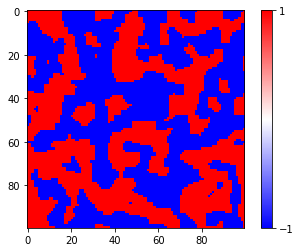

J = 1, T = 6 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = -0.0342


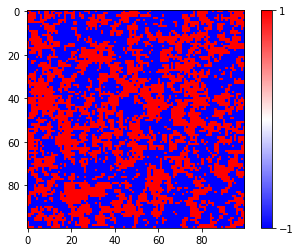

J = -1, T = 1 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = 0.0


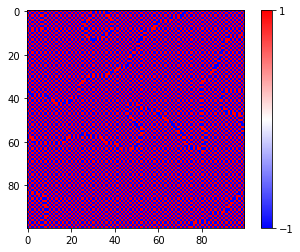

In [76]:
lattice = randomlattice(100,100)
lattice= metropolisSuperFastDemo(lattice,100000)
plotlattice(lattice)
lattice = randomlattice(100,100)
lattice= metropolisSuperFastDemo(lattice,100000,T=6)
plotlattice(lattice)
lattice = randomlattice(100,100)
lattice= metropolisSuperFastDemo(lattice,1000000,J=-1)
plotlattice(lattice)


We see that we get a variety of results given our parameters. At T=1, we get the formation of domains since we have not yet reached equilibrium. At T=5, the increased temperature leads to worse domain formation. At J =-1, we see that we get the boundary creation that we saw in Professor Miller's slides, rather than domains.

In [65]:
# x = np.linspace(5,10,10)
# y = x[5:]
# print(x)
# print(y)

In [16]:
# #Computational "Proof" that we are allowed to make this change to our algorithim.
# for i in range(100):
#     lattice = randomlattice(100,100)
#     i,j = pickpoint(lattice)
#     #print(i,j)
#     totalEnergy1 = totalEnergy(lattice)
#     #print("Total Energy1 " + str(totalEnergy1))
#     localEnergy1 = localEnergy(lattice,i,j)+ localEnergy(lattice,i+1,j) + localEnergy(lattice,i-1,j) + localEnergy(lattice,i,j+1) + localEnergy(lattice,i,j-1)
#     #print(localEnergy1)
#     lattice = flip_spin(lattice,i,j)
#     totalEnergy2 = totalEnergy(lattice)
#     #print("Total Energy2 " + str(totalEnergy2))
#     localEnergy2 =localEnergy(lattice,i,j)+ localEnergy(lattice,i+1,j) + localEnergy(lattice,i-1,j) + localEnergy(lattice,i,j+1) + localEnergy(lattice,i,j-1)
#     #print(localEnergy2)
#     deltalocal = localEnergy2 - localEnergy1
#     deltatotal = totalEnergy2 - totalEnergy1
#     print("Local " + str(deltalocal), "Total " + str(deltatotal))

In [17]:
# num_steps = int(2e5)
# lattice1 = randomlattice(50,50)
# print(lattice1)
# lattice1, mag = metropolisCustom(lattice1,num_steps)


In [18]:
# print(lattice1[13][27])
# J=1
# plotlattice(lattice1)
# i = 10
# j = 24
# initialLEnergy = localEnergy(lattice1,i,j,J) + localEnergy(lattice,(i+1)% len(lattice) ,j,J) + localEnergy(lattice,(i-1) % len(lattice),j,J) + localEnergy(lattice,i,(j+1) % len(lattice[0]),J) + localEnergy(lattice,i,(j-1) %len(lattice[0]),J)
# print("INit L=" +str(initialLEnergy))
# initialTEnergy = totalEnergy(lattice1)
# print("Init T=" + str(initialTEnergy))
# flip_spin(lattice1,i,j)
# plotlattice(lattice1)
# finalLEnergy = localEnergy(lattice1,i,j,J) + localEnergy(lattice,(i+1)% len(lattice),j,J) + localEnergy(lattice,(i-1)% len(lattice),j,J) + localEnergy(lattice,i,(j+1) % len(lattice[0]),J) + localEnergy(lattice,i,(j-1) % len(lattice[0]),J)
# print("Final L" +str(finalLEnergy))
# finalTEnergy = totalEnergy(lattice1)
# print("Final T" +str(finalTEnergy))
# print("Local Delta:" + str(finalLEnergy - initialLEnergy))
# print("Total Delta:" + str(finalTEnergy - initialTEnergy))

# plotlattice(lattice1)

In [19]:
# num_steps = int(2e6)
# Temp = np.linspace(1e-1,10,10)
# print(Temp)
# lattice_array = [randomlattice(70,70) for i in range(len(Temp))]
# mag = [0 for i in range(len(Temp))]
# magnet_array = [0 for i in range(len(Temp))]
# for i in range(len(Temp)):
#     lattice_array[i],mag = metropolisCustom(lattice_array[i],num_steps, T = Temp[i], J =1, H = 0)
#     plt.plot(mag)
#     plt.show()
#     magnet_array[i] = mag[-1]
# plt.plot(magnet_array)
# plt.show()

### Exercise 7: Perform measurements <a class="anchor" name="ex7"></a>
Calculate the average magnetisation, average energy, and specific heat of the equilibrated system. If you perform many simulations at different temperatures, you should be in a position to observe phase transitions and measure the transition or Curie temperature, $kT_c$. 

First, we want to discover what N_eq is for a given lattice size. We can discover this by running our simulation many times at a given N and seeing if it converges for that N. We should note that this N_eq is going to vary greatly for different temperatures. We shall do it at T = 1, and understand that this will be an overestimate for T < 1 and an underestimate for T > 1. Later on, we shall use a much more robust time interval to account for the increased fluctuations surrounding the Curie Temperature.

In [21]:
# ## Size = 10
# N = 5
# num_steps = int(1e5)
# endMags =[]
# for i in range(30):
#     lattice1 = randomlattice(N,N)
#     lattice1, mag = metropolisMoMo(lattice1,num_steps,T=1)
#     endMags.append(mag[-1])
# plt.plot(mag)
# plt.show()
# for i in range(len(endMags)):
#     plt.scatter(i,endMags[i])
# plt.show()

In [102]:
num_steps = int(1e4)
endMags =[]
for i in range(25):
    lattice1 = randomlattice(10,10)
    lattice1, mag = metropolisCustom(lattice1,num_steps,T=1)
    endMags.append(mag[-1])


J = 1, T = 1 H = 0
Per Magnetization = -1.0
J = 1, T = 1 H = 0
Per Magnetization = 1.0
J = 1, T = 1 H = 0
Per Magnetization = 1.0
J = 1, T = 1 H = 0
Per Magnetization = -1.0
J = 1, T = 1 H = 0
Per Magnetization = -0.4
J = 1, T = 1 H = 0
Per Magnetization = 0.2
J = 1, T = 1 H = 0
Per Magnetization = 1.0
J = 1, T = 1 H = 0
Per Magnetization = 1.0
J = 1, T = 1 H = 0
Per Magnetization = 0.2
J = 1, T = 1 H = 0
Per Magnetization = -1.0
J = 1, T = 1 H = 0
Per Magnetization = 1.0
J = 1, T = 1 H = 0
Per Magnetization = -1.0
J = 1, T = 1 H = 0
Per Magnetization = -1.0
J = 1, T = 1 H = 0
Per Magnetization = 1.0
J = 1, T = 1 H = 0
Per Magnetization = -1.0
J = 1, T = 1 H = 0
Per Magnetization = -1.0
J = 1, T = 1 H = 0
Per Magnetization = -0.2
J = 1, T = 1 H = 0
Per Magnetization = -1.0
J = 1, T = 1 H = 0
Per Magnetization = 1.0
J = 1, T = 1 H = 0
Per Magnetization = -1.0
J = 1, T = 1 H = 0
Per Magnetization = -0.4
J = 1, T = 1 H = 0
Per Magnetization = 1.0
J = 1, T = 1 H = 0
Per Magnetization = 1.0

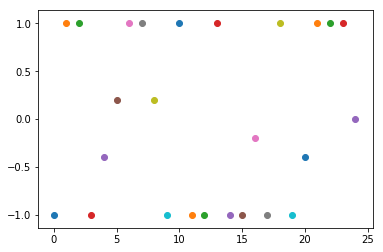

In [103]:
for i in range(len(endMags)):
    plt.scatter(i,endMags[i])
plt.show()

We notice that the scattered dots that are not at either -1 or 1 are at very precise magnetizations. These dots correspond to the lattices that settle into the local minimum of having perfect rectangular domains that don't converge to one large domain. These will happen with a probability that is dependent on the size of the lattice. 

Now that we are relatively satisfied with our N_eq's, we will simulate the simulation equilibrium magnetization as a function of temperature.

In [64]:
# print(datetime.datetime.now())
# Temp = np.linspace(1e0,10,100)
# Temp = np.append(Temp,[4.2,4.3,4.6])
# Temp = np.sort(Temp)
# tempMag = np.zeros(len(Temp))
# tempList = np.zeros(len(Temp))
# tempEnergy = np.zeros(len(Temp))
# num_steps1 = int(1e5)
# num_steps2 = int(1e6)
# num_steps3 = int(2e5)
# Energy_Density = []
# for i in range(len(Temp)):
#     endMags = []
#     lattice1 = randomlattice(20,20)
#     if Temp[i] < 4:
#         lattice1, mag, energy = metropolisMoMo(lattice1,num_steps1,T=Temp[i])
#         avgMag = np.sum([mag[-i] for i in range(int(3*num_steps1/10))])/(3*num_steps1/10)
#         avgEnergy = np.sum([energy[-i] for i in range(int(3*num_steps1/10))])/(3*num_steps1/10)
#         Energy_Density = EnergyDensity.append(energy)
#         print("Mag = " + str(avgMag))
#         print("Energy = " + str(avgEnergy))
#     elif Temp[i] < 5.5:
#         lattice1, mag, energy = metropolisMoMo(lattice1,num_steps2,T=Temp[i])
#         avgMag = np.sum([mag[-i] for i in range(int(3*num_steps2/10))])/(3*num_steps2/10)
#         avgEnergy = np.sum([energy[-i] for i in range(int(3*num_steps1/10))])/(3*num_steps1/10)
#         Energy_Density = EnergyDensity.append(energy)
#         print("Mag = " + str(avgMag))
#         print("Energy = " + str(avgEnergy))
        
#     else:
#         lattice1, mag, energy = metropolisMoMo(lattice1,num_steps3,T=Temp[i])
#         avgMag = np.sum([mag[-i] for i in range(int(3*num_steps3/10))])/(3*num_steps3/10)
#         avgEnergy = np.sum([energy[-i] for i in range(int(3*num_steps1/10))])/(3*num_steps1/10)
#         Energy_Density = EnergyDensity.append(energy)
#         print("Mag = " + str(avgMag))
#         print("Energy = " + str(avgEnergy))
#     plt.plot(np.abs(mag))
#     plt.plot(np.abs(energy))
#     plt.show()
#     tempList[i] = Temp[i]
#     tempMag[i] = abs(avgMag)
#     tempEnergy[i] = abs(avgEnergy)
# print(datetime.datetime.now())

Let's try it again

This will be the code for the drastically shorter 5x5 code.

In [77]:
# print(datetime.datetime.now())
# Temp = np.linspace(1e0,10,30)
# Temp = np.append(Temp,[4.2,4.3,4.6])
# Temp = np.sort(Temp)
# tempMag = np.zeros(len(Temp))
# tempList = np.zeros(len(Temp))
# tempEnergy = np.zeros(len(Temp))
# num_steps1 = int(8e4)
# num_steps2 = int(8e5)
# num_steps3 = int(8e4)
# Energy_Density = [0 for i in range(len(Temp))]
# for i in range(len(Temp)):
#     endMags = []
#     lattice1 = randomlattice(5,5)
#     if Temp[i] < 4:
#         lattice1, mag, energy = metropolisSuperFast(lattice1,num_steps1,T=Temp[i])
#         avgMag = np.sum([mag[-i] for i in range(int(2*num_steps1/10))])/(2*num_steps1/10)
#         avgEnergy = np.sum([energy[-i] for i in range(int(2*num_steps1/10))])/(2*num_steps1/10)
#         Energy_Density[i] = 4*5*5*energy[int(8/10 *num_steps1)+1:]
#         print("Mag = " + str(avgMag))
#         print("Energy = " + str(avgEnergy))
#     elif Temp[i] < 5.5:
#         lattice1, mag, energy = metropolisSuperFast(lattice1,num_steps2,T=Temp[i])
#         avgMag = np.sum([mag[-i] for i in range(int(2*num_steps2/10))])/(2*num_steps2/10)
#         avgEnergy = np.sum([energy[-i] for i in range(int(2*num_steps2/10))])/(2*num_steps2/10)
#         Energy_Density[i] = 4*5*5*energy[int(8/10 *num_steps2)+1:]
#         print("Mag = " + str(avgMag))
#         print("Energy = " + str(avgEnergy))
        
#     else:
#         lattice1, mag, energy = metropolisSuperFast(lattice1,num_steps3,T=Temp[i])
#         avgMag = np.sum([mag[-i] for i in range(int(2*num_steps3/10))])/(2*num_steps3/10)
#         avgEnergy = np.sum([energy[-i] for i in range(int(2*num_steps3/10))])/(2*num_steps3/10)
#         Energy_Density[i] = 4*5*5*energy[int(8/10 *num_steps3)+1:]
#         print("Mag = " + str(avgMag))
#         print("Energy = " + str(avgEnergy))
#     plt.plot(np.abs(mag))
#     plt.plot(np.abs(energy))
#     plt.show()
#     tempList[i] = Temp[i]
#     tempMag[i] = abs(avgMag)
#     tempEnergy[i] = abs(avgEnergy)
# print(datetime.datetime.now())

In [78]:
# specificHeat = [0 for i in range(len(Temp))]
# # for i in range(len(Temp)):
# #     Energy_Density[i] = Energy_Density[i][int(9/10 *len(Energy_Density[i])) :]

# for i in range(len(tempMag)):
#     plt.scatter(tempList[i],tempMag[i],color = 'red')

#     #plt.scatter(tempList[i],tempEnergy[i],color = 'blue')
# plt.show()
    
# specificHeat = [0 for i in range(len(Temp))]
# for i in range(len(Temp)):
#     specificHeat[i] = np.var(Energy_Density[i])/Temp[i]**2
# for i in range(len(Temp)):
#     plt.scatter(tempList[i],specificHeat[i],color = 'orange')
# plt.ylim(0,.005)
# plt.show()



This is the proper code to run the long scan, for a 25 by 25 lattice. Since taking the total energy is incredibly inefficient, we are only going to compute it when we are certain that we are at equilibrium, which we shall conservatively say is certain when we have run through 90% of our simulation.

2018-11-01 11:44:38.401486
J = 1, T = 1.0 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = 1.0
Mag = 0.9999035
Energy = 0.9999


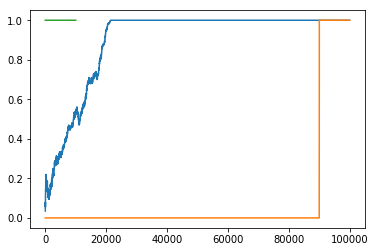

J = 1, T = 1.3103448275862069 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = 1.0
Mag = 0.999901
Energy = 0.9999


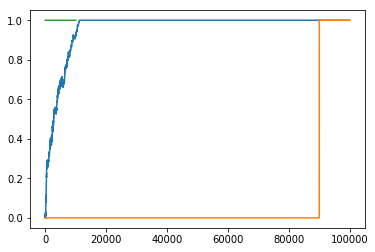

J = 1, T = 1.6206896551724137 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = -1.0
Mag = -0.999584
Energy = 0.999274


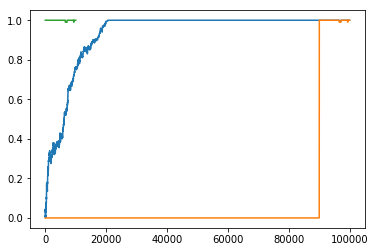

J = 1, T = 1.9310344827586208 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = -0.28
Mag = -0.1966485
Energy = 0.8648379999999999


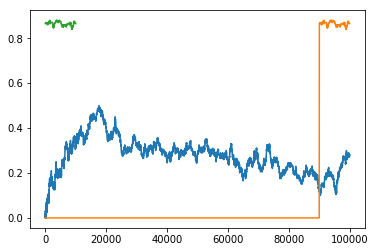

J = 1, T = 2.2413793103448274 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = -0.995
Mag = -0.9985164999999999
Energy = 0.9971180000000001


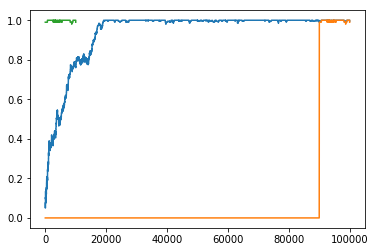

J = 1, T = 2.5517241379310347 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = 0.995
Mag = 0.9946404999999999
Energy = 0.9894200000000001


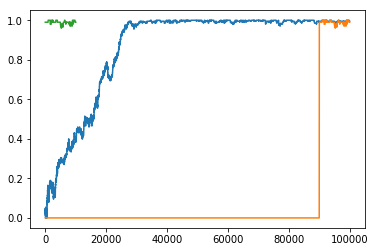

J = 1, T = 2.8620689655172415 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = -0.995
Mag = -0.9942694999999999
Energy = 0.9891815


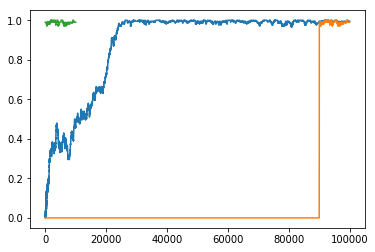

J = 1, T = 3.1724137931034484 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = -0.98
Mag = -0.9740559999999999
Energy = 0.9538395000000001


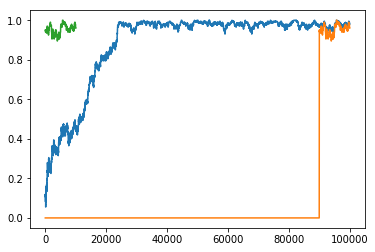

J = 1, T = 3.4827586206896552 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = -0.975
Mag = -0.9640970000000001
Energy = 0.9416899999999999


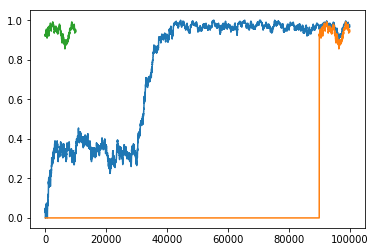

J = 1, T = 3.793103448275862 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = 0.995
Mag = 0.954116
Energy = 0.924277


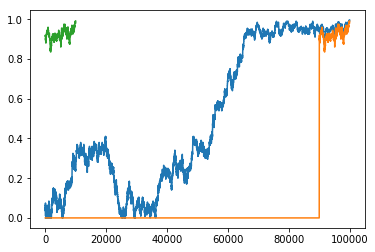

J = 1, T = 4.103448275862069 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = -0.865
Mag = -0.89635345
Energy = 0.85780815


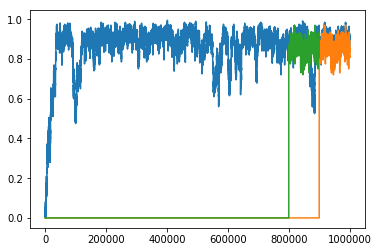

J = 1, T = 4.2 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = 0.865
Mag = 0.87117435
Energy = 0.83318135


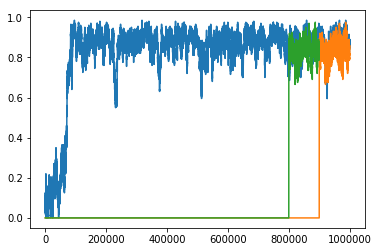

J = 1, T = 4.3 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = 0.9
Mag = 0.8426694
Energy = 0.8092653000000002


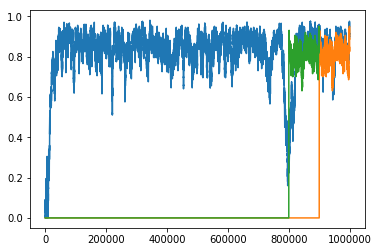

J = 1, T = 4.413793103448276 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = -0.845
Mag = -0.7327935000000001
Energy = 0.7555626


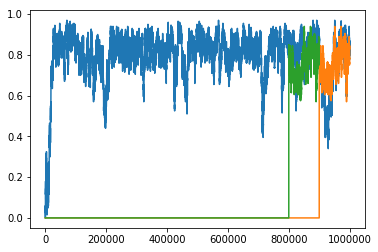

J = 1, T = 4.46 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = 0.425
Mag = 0.75533545
Energy = 0.7476110499999999


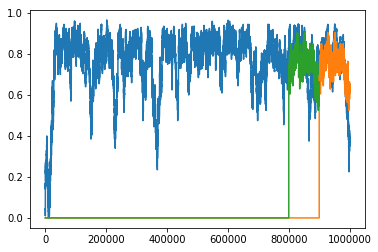

J = 1, T = 4.48 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = -0.665
Mag = -0.7594426999999999
Energy = 0.74260345


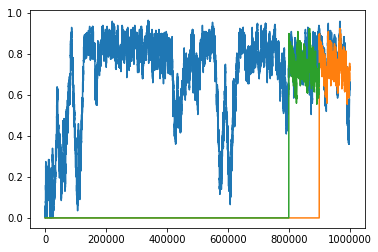

J = 1, T = 4.51 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = 0.785
Mag = 0.80514475
Energy = 0.7610533500000001


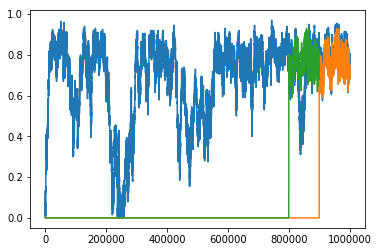

J = 1, T = 4.52 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = 0.885
Mag = 0.7510903999999999
Energy = 0.7376712


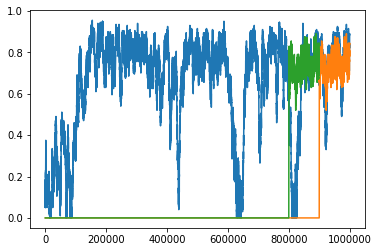

J = 1, T = 4.53 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = 0.725
Mag = 0.7654711000000002
Energy = 0.74662545


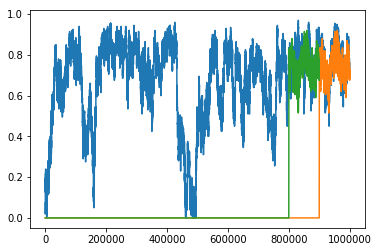

J = 1, T = 4.54 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = -0.745
Mag = -0.8157842
Energy = 0.7672189


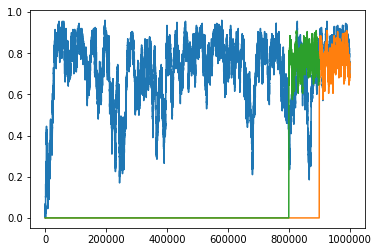

J = 1, T = 4.55 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = -0.76
Mag = -0.7025076000000001
Energy = 0.7052773499999999


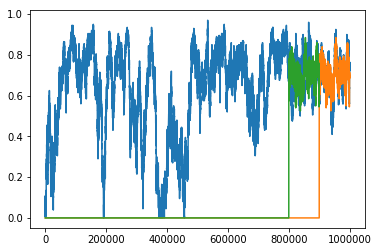

J = 1, T = 4.58 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = 0.72
Mag = 0.6994246000000002
Energy = 0.7168308000000002


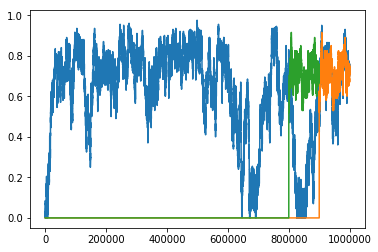

J = 1, T = 4.6 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = 0.845
Mag = 0.7682046999999999
Energy = 0.7374824499999999


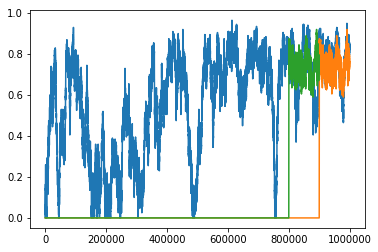

J = 1, T = 4.62 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = -0.45
Mag = -0.6807354499999998
Energy = 0.7025785499999999


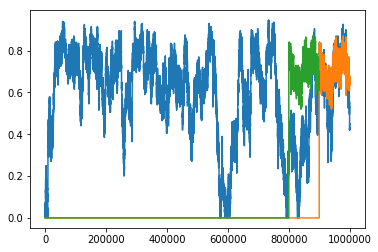

J = 1, T = 4.724137931034483 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = 0.785
Mag = 0.2952684
Energy = 0.5941248


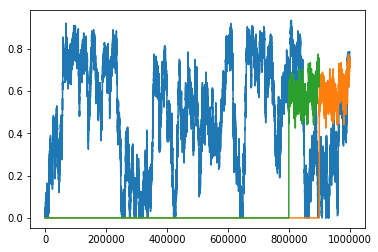

J = 1, T = 5.0344827586206895 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = 0.135
Mag = -0.26174135000000004
Energy = 0.5336647000000001


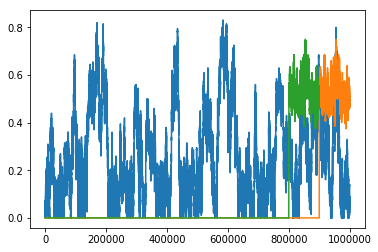

J = 1, T = 5.344827586206897 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = -0.355
Mag = 0.005143300000000003
Energy = 0.49048729999999996


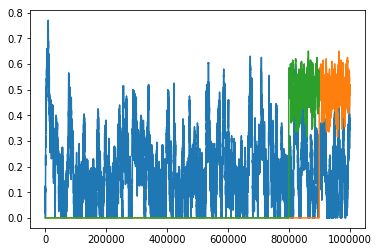

J = 1, T = 5.655172413793103 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = -0.105
Mag = -0.014652000000000002
Energy = 0.442391


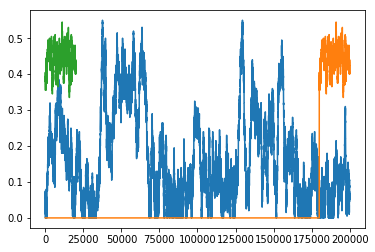

J = 1, T = 5.9655172413793105 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = -0.04
Mag = 0.14266375
Energy = 0.40298900000000004


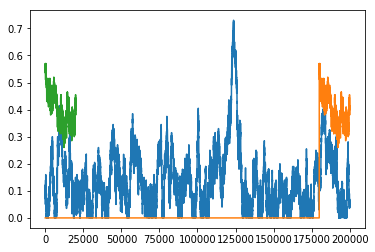

J = 1, T = 6.275862068965518 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = 0.255
Mag = 0.1280215
Energy = 0.38209499999999996


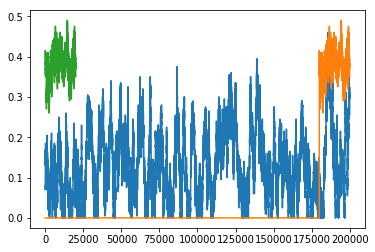

J = 1, T = 6.586206896551724 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = -0.015
Mag = 0.0027697500000000035
Energy = 0.356178


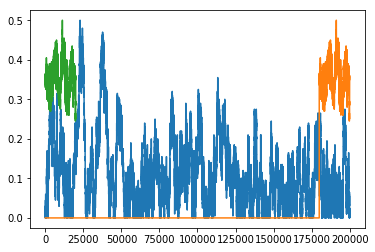

J = 1, T = 6.8965517241379315 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = -0.215
Mag = -0.10936850000000002
Energy = 0.34946425


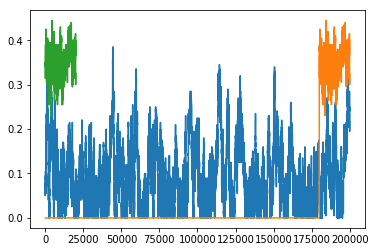

J = 1, T = 7.206896551724138 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = 0.155
Mag = 0.0502875
Energy = 0.3144675


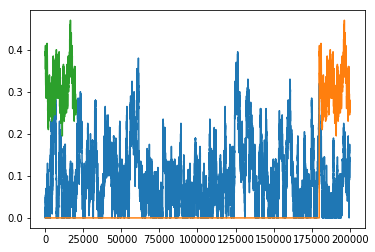

J = 1, T = 7.517241379310345 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = -0.045
Mag = -0.031373000000000005
Energy = 0.2896997499999999


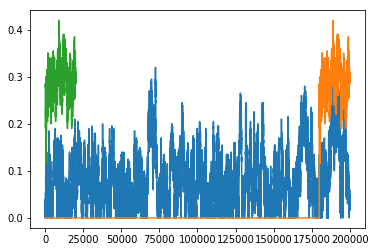

J = 1, T = 7.827586206896552 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = -0.085
Mag = -0.0014282499999999998
Energy = 0.28768024999999997


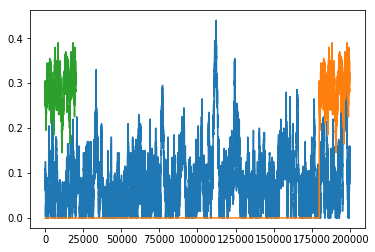

J = 1, T = 8.137931034482758 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = 0.09
Mag = -0.03705700000000001
Energy = 0.27885675


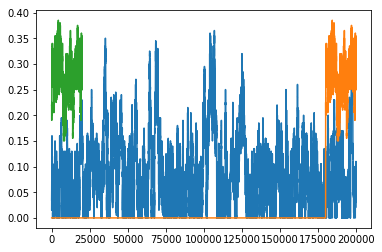

J = 1, T = 8.448275862068966 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = 0.105
Mag = -0.04354500000000001
Energy = 0.26408550000000003


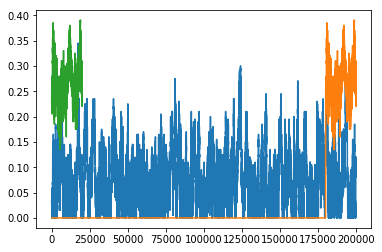

J = 1, T = 8.758620689655173 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = -0.185
Mag = 0.014464250000000001
Energy = 0.24424950000000004


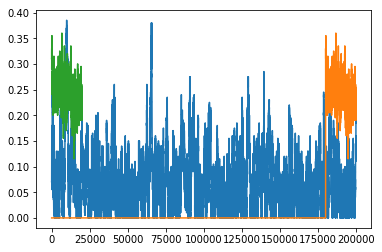

J = 1, T = 9.068965517241379 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = 0.17
Mag = 0.01696075
Energy = 0.24477175


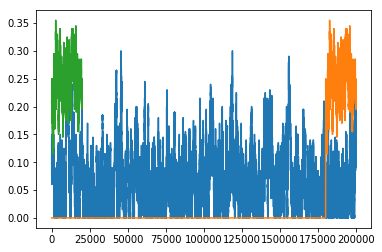

J = 1, T = 9.379310344827587 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = 0.035
Mag = -0.026376750000000004
Energy = 0.24395699999999998


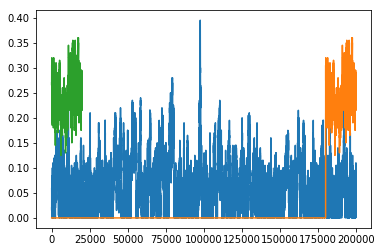

J = 1, T = 9.689655172413794 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = -0.085
Mag = -0.01584025
Energy = 0.22170900000000002


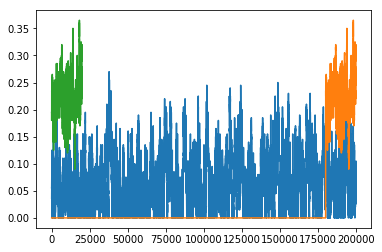

J = 1, T = 10.0 H = 0
0.0 percent
10.0 percent
20.0 percent
30.0 percent
40.0 percent
50.0 percent
60.0 percent
70.0 percent
80.0 percent
90.0 percent
Per Magnetization = 0.085
Mag = 0.006527
Energy = 0.20922399999999997


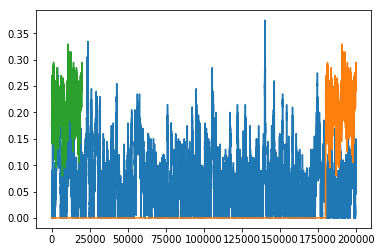

2018-11-01 12:31:52.320612


In [25]:
print(datetime.datetime.now())
Temp = np.linspace(1e0,10,30)
N = 20
Temp = np.append(Temp,[4.2,4.3,4.6,4.51,4.52,4.53,4.55,4.54,4.58,4.62,4.48,4.46])
Temp = np.sort(Temp)
tempMag = np.zeros(len(Temp))
tempList = np.zeros(len(Temp))
tempEnergy = np.zeros(len(Temp))
num_steps1 = int(1e5)
num_steps2 = int(1e6)
num_steps3 = int(2e5)
Energy_Density = [0 for i in range(len(Temp))]
for i in range(len(Temp)):
    endMags = []
    lattice1 = randomlattice(N,N)
    if Temp[i] < 4:
        lattice1, mag, energy = metropolisMoMo(lattice1,num_steps1,T=Temp[i])
        avgMag = np.sum([mag[-i] for i in range(int(num_steps1/10))])/(num_steps1/10)
        avgEnergy = np.sum([energy[-i] for i in range(int(num_steps1/10))])/(num_steps1/10)
        Energy_Density[i] = energy[int(9/10 *num_steps1)+1:]
        print("Mag = " + str(avgMag))
        print("Energy = " + str(avgEnergy))
    elif Temp[i] < 5.5:
        lattice1, mag, energy = metropolisMoMo(lattice1,num_steps2,T=Temp[i])
        avgMag = np.sum([mag[-i] for i in range(int(num_steps2/10))])/(num_steps2/10)
        avgEnergy = np.sum([energy[-i] for i in range(int(num_steps2/10))])/(num_steps2/10)
        Energy_Density[i] = energy[int(9/10 *num_steps2)+1:]
        print("Mag = " + str(avgMag))
        print("Energy = " + str(avgEnergy))
        
    else:
        lattice1, mag, energy = metropolisMoMo(lattice1,num_steps3,T=Temp[i])
        avgMag = np.sum([mag[-i] for i in range(int(num_steps3/10))])/(num_steps3/10)
        avgEnergy = np.sum([energy[-i] for i in range(int(num_steps3/10))])/(num_steps3/10)
        Energy_Density[i] = energy[int(9/10 *num_steps3)+1:]
        print("Mag = " + str(avgMag))
        print("Energy = " + str(avgEnergy))
    plt.plot(np.abs(mag))
    plt.plot(np.abs(energy))
    plt.plot(Energy_Density[i])
    plt.show()
    tempList[i] = Temp[i]
    tempMag[i] = abs(avgMag)
    tempEnergy[i] = abs(avgEnergy)
print(datetime.datetime.now())

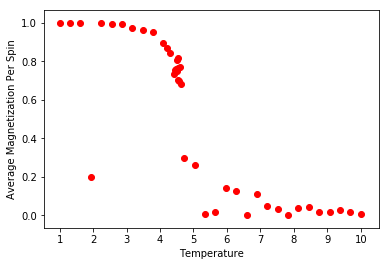

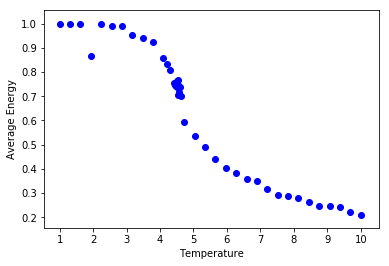

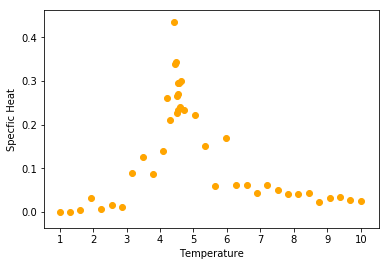

In [95]:
# # for i in range(len(Temp)):
#     Energy_Density[i] = Energy_Density[i][int(9/10 *len(Energy_Density[i])) :]

for i in range(len(tempMag)):
    plt.scatter(tempList[i],tempMag[i],color = 'red')
plt.xticks(np.linspace(1,10,10))
plt.ylabel("Average Magnetization Per Spin")
plt.xlabel("Temperature")
plt.show()
for i in range(len(tempEnergy)):
    plt.scatter(tempList[i],tempEnergy[i],color = 'blue')

plt.xticks(np.linspace(1,10,10))
plt.ylabel("Average Energy")
plt.xlabel("Temperature")
plt.show()
    
specificHeat = [0 for i in range(len(Temp))]
for i in range(len(Temp)):
    if len(Energy_Density[i]) > 400000:
        Energy_Density[i]= Energy_Density[i][int(-1*num_steps2/10):]
for i in range(len(Temp)):
    specificHeat[i] = np.var(Energy_Density[i])/Temp[i]**2
    
specificHeatFull = [i * N*N*4 for i in specificHeat] #This is to turn the system from an energy density to a full Energy. The variance should scale in this way since it is only scalars.
for i in range(len(Temp)):
    plt.scatter(tempList[i],specificHeatFull[i],color = 'orange')
plt.ylabel("Specfic Heat")
plt.xticks(np.linspace(1,10,10))
plt.xlabel("Temperature")
plt.show()


We see that we are able to get some emergent properties. In particular, we see that we get a phase transition at approximately T = 4.52. According to the slides, the phase transition should occur at T = 2.26, which is almost exactly half, so that is an interesting phenomena which could hint at some subtle differences in the algorithim

Code for Trying 3D stuff after we complete the assignment. Didn't have enough time to figure out how to properly visualize, but in principle this algorithim will allow for implementation on 3D lattices.

In [40]:
def normallattice3D(N, M,L, value=0):
    '''
    This function returns an N (rows) x M (columns) lattice with identical values value
    '''
    
    return np.full((N, M,L), value)

def randomlattice3D(N, M,L):
    '''
    This function returns an N (rows) x M (columns) x L (depth) lattice with randomized spin values 0 or 1
    '''
    return rng.choice([-1,1], (N, M,L))
lattice = randomlattice3D(4,4,4)
print(lattice[3][3][3])


def flip_spin3D(lattice,i,j,k):
    lattice[i][j][k] = -1*lattice[i][j][k]
    return lattice

def random_flip3D(lattice):
    i,j = pickpoint3D(lattice)
    lattice = flip_spin3D(lattice,i,j)
    return lattice 
    
def neighborsSum3D(lattice, i, j,k):
    '''
    Sums the spins of the lattice points at four neighbor sites.
        Takes into account the size of the lattice in 
        terms of number of rows (i) and columns (j),
        thus implementing periodic boundary conditions.
    '''
    
    ip1 = (i + 1) % len(lattice)

    im1 = (i - 1) % len(lattice)

    jp1 = (j + 1) % len(lattice[0])

    jm1 = (j - 1) % len(lattice[0])

    km1 = (k-1) %len(lattice[1])

    kp1 = (k +1) %len(lattice[1])

    return (lattice[ip1][j][k] + lattice[im1][j][k]

            + lattice[i][jp1][k] + lattice[i][jm1][k] + lattice[i][j][km1] + lattice[i][j][kp1])

#E_i = -J\times s_i \times neighborsSum = -J \sum s_i s_j, where s_i is fixed. This is the key to the second part

def localEnergy3D(lattice,i,j,k,J=1,H=0):
    return -J*lattice[i][j][k]*neighborsSum3D(lattice,i,j,k)
def totalEnergy3D(lattice,J=1,H=0):
    sumEnergy = 0
    for i in range(len(lattice)):
        for j in range(len(lattice[i])):
            for k in range(len(lattice[i][j])):
                sumEnergy += localEnergy(lattice,i,j,k,J=J)
    sumEnergy += -H*totalMagnetization(lattice)
    return sumEnergy

def perMagnetization3D(lattice):
    totMag = np.sum(lattice)
    perMag = totMag/(len(lattice)*len(lattice[0])*len(lattice[0][0]))
    return perMag


def metropolisCustom3D(lattice,Num_Steps,T=1,J=1,H=0):
    N = len(lattice)
    M = len(lattice[0])
    L= len(lattice[0][0])
    magneticMag = np.zeros(Num_Steps)
    print("Initial Magnetization = " + str(totalMagnetization(lattice)))
    print('J = ' + str(J) + ', T = '+ str(T), 'H = ' + str(H))
    #plotlattice(lattice)
    for n in range(Num_Steps):
    #We have calculated our initial energy of the system
        i = rng.randint(N)
        j = rng.randint(M)
        k = rng.randint(L)
    ## Now we shall flip our spin, calculate the energy, and then flip the spin back. This saves us the trouble of
    
    #dealing with object stuff.
        if H == 0:
            localEnergy1 = localEnergy3D(lattice,i,j,k,J)+ localEnergy3D(lattice,(i+1)% len(lattice) ,j,k,J) + localEnergy3D(lattice,(i-1) % len(lattice),j,k,J) + localEnergy3D(lattice,i,(j+1) % len(lattice[0]),k,J) + localEnergy3D(lattice,i,(j-1) %len(lattice[0]),k,J) + localEnergy3D(lattice,i,j,(k+1) % len(lattice[0][0]),J)+ localEnergy3D(lattice,i,j,(k-1) % len(lattice[0][0]),J)
            flip_spin3D(lattice,i,j,k)
            localEnergy2 = localEnergy3D(lattice,i,j,J)+ localEnergy3D(lattice,(i+1)% len(lattice),j,J) + localEnergy3D(lattice,(i-1)% len(lattice),j,J) + localEnergy3D(lattice,i,(j+1) % len(lattice[0]),J) + localEnergy3D(lattice,i,(j-1) % len(lattice[0]),J) + localEnergy3D(lattice,i,j,(k+1) % len(lattice[0][0]),J)+ localEnergy3D(lattice,i,j,(k-1) % len(lattice[0][0]),J)
        else:
            localEnergy1 = localEnergy3D(lattice,i,j,k,J)+ localEnergy3D(lattice,(i+1)% len(lattice) ,j,k,J) + localEnergy3D(lattice,(i-1) % len(lattice),j,k,J) + localEnergy3D(lattice,i,(j+1) % len(lattice[0]),k,J) + localEnergy3D(lattice,i,(j-1) %len(lattice[0]),k,J) + localEnergy3D(lattice,i,j,(k+1) % len(lattice[0][0]),J)+ localEnergy3D(lattice,i,j,(k-1) % len(lattice[0][0]),J) - H*totalMagnetization(lattice)
            flip_spin3D(lattice,i,j,k)
            localEnergy2 = localEnergy3D(lattice,i,j,k,J)+ localEnergy3D(lattice,(i+1)% len(lattice),j,k,J) + localEnergy3D(lattice,(i-1)% len(lattice),j,k,J) + localEnergy3D(lattice,i,(j+1) % len(lattice[0]),k,J) + localEnergy3D(lattice,i,k,(j-1) % len(lattice[0]),k,J) + localEnergy3D(lattice,i,j,(k+1) % len(lattice[0][0]),J)+ localEnergy3D(lattice,i,j,(k-1) % len(lattice[0][0]),J) - H*totalMagnetization(lattice)
    #Now that we have flipped back our spin, we can calculate deltaEnergy.
        deltaEnergy =(localEnergy2 - localEnergy1)
        T=1
        if deltaEnergy > 0:
            r = rng.random()
            if r>=np.exp(-1*deltaEnergy/T):
                flip_spin(lattice,i,j)
        #if (k%(Num_Steps/10)) == 0:
            #print(str((k/(Num_Steps/10))*10) + " percent")
            #plotlattice(lattice)
        magneticMag[n] = perMagnetization3D(lattice)
    print("Final Magnetization = " + str(totalMagnetization(lattice)))
    return lattice,magneticMag

1


In [ ]:
lattice = randomlattice3D(20,20,20)
print(lattice)
lattice3, mag3 = metropolisCustom3D(lattice,10000,T=1,J=2)
print(lattice3)
plt.plot(mag3)
plt.show()
# fig = plt.figure()
# ax = fig.add_subplot(111,projection = '3d')
# xvals = []
# yvals = []
# zvals = []
# for i in range(len(lattice3)):
#     for j in range(len(lattice3[0])):
#         for k in range(len(lattice3[0][0])):
#             if lattice3[i][j][k] == 1:
#                 xvals.append(i)
#                 yvals.append(j)
#                 zvals.append(k)
# ax.scatter(xvals,yvals,zvals)